# "[ML] 선형회귀"
> "보험료 예측"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [선형회귀, 보험료 예측]
- author: 도형준

# 선형회귀: 보험료 예측

- 1. 데이터 수집
- 2. 데이터 전처리
- 3. 모델 학습
- 4. 모델 평가
- 5. 모델 배포

In [1]:
import pandas as pd

## 1. title 데이터 수집

In [2]:
file_name = "insurance.csv"
file_url = f"https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/{file_name}"
df = pd.read_csv(file_url)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# 데이터가 가지고 있는 변수 확인
df.info()
# Column : 변수 이름
# Non-Null Count : 결측치
# Dtype : 자료형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# 통계 정보 출력
# 연속형 변수에 대한 통계값
# → sex, smoker, region 제외
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
# 데이터 프레임 내부의 값을 소수점 2자리까지만 표시
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


## 2. 데이터 전처리

- 전처리란?
    - 모델링하기 좋게 데이터를 다듬는다.

### 범주형 변수 변환

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# X: 독립변수(들), y: 종속변수(1개)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']
model.fit(X, y)

ValueError: could not convert string to float: 'female'

#### Object → 0 or 1

In [9]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
df.smoker.eq('yes')
# df.smoker == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [11]:
# eq 메소드로 통해 yes와 일치하는지 Boolean화한 뒤
# mul 메소드로 1을 곱해줌 (1/0)
df.smoker = df.smoker.eq('yes').mul(1)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86


In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int32
region       object
expenses    float64
dtype: object

#### 더미 변수 / 원-핫 인코딩

##### df.column.unique(), df.column.nunique()

In [13]:
#@title df.column.unique(), df.column.nunique()
# 범주 갯수 확인
df.sex.unique(), df.sex.nunique(), df.region.unique(), df.region.nunique(),

(array(['female', 'male'], dtype=object),
 2,
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object),
 4)

##### pd.get_dummies()

In [14]:
pd.get_dummies(df, columns = ['sex', 'region'])
# 1338 rows × 11 columns

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,0,0,0,0,1
1,18,33.80,1,0,1725.55,0,1,0,0,1,0
2,28,33.00,3,0,4449.46,0,1,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,1,0,0
4,32,28.90,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,0,1,0,1,0,0
1334,18,31.90,0,0,2205.98,1,0,1,0,0,0
1335,18,36.90,0,0,1629.83,1,0,0,0,1,0
1336,21,25.80,0,0,2007.95,1,0,0,0,0,1


In [15]:
# 고윳값을 덜어내어 부하 줄임 (계산양 줄임)
pd.get_dummies(df, columns = ['sex', 'region'], drop_first=True)
# 1338 rows × 9 columns

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [16]:
# 원본에 반영
df_dummy = pd.get_dummies(df, columns = ['sex', 'region'], drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int32  
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int32(1), int64(2), uint8(4)
memory usage: 52.4 KB


### 학습셋과 시험셋 나누기

- 훈련을 한 것으로 모델을 시험하면, 컴퓨터는 맞출 수 밖에 없음.
- 데이터의 일부를 시험셋으로 독립시켜서, 훈련셋과 시험셋으로 분리.

In [17]:
# X,y => 독립변수, 종속변수
df_dummy.tail()

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1
1337,61,29.10,0,1,29141.36,0,1,0,0


In [18]:
df_dummy.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

#### 독립변수, 종속변수

In [20]:
X = df_dummy[['age', 'bmi', 'children', 'smoker', 'sex_male',
        'region_northwest', 'region_southeast', 'region_southwest']]
y = df_dummy['expenses']

#### Scikit-learn

- train_test_split()

In [21]:
from sklearn.model_selection import train_test_split

# random_state : 일관성 유지 (like시드 => 임의로 결정되는 값을 특정 값으로 만드는)
# test_size : 비율 => 테스트셋(시험셋) 비율
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=100)

## 3. 모델링

* 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델
* 모델링에 사용할 머신러닝 알고리즘을 선택
* 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수에 평가셋의 <br>독립변수를 인수로 대입

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### model.fit()

In [23]:
# 모델을 학습시키는 함수
# [학습시킨다]
# - 데이터를 모델 안에 넣어서
# - 독립변수와 종속변수 간의 관계들을 분석해
# - 새로운 데이터를 예측할 수 있는 상태로 만드는 것
# model.fit(독립변수, 종속변수)
model.fit(X_train, y_train)

LinearRegression()

### 예측 -  model.predict()

In [24]:
pred = model.predict(X_test)

## 4. 예측 모델 평가

- 테이블로 평가
- 그래프로 평가 ✔
- 통계적 방법으로 평가 (RMSE) ✔✔✔

#### 테이블로 평가

In [25]:
# 두 데이터를 비교하여 정확도 확인
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [26]:
X_test

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
12,23,34.40,0,0,1,0,0,1
306,28,27.50,2,0,0,0,0,1
318,44,27.60,0,0,0,1,0,0
815,20,31.50,0,0,0,0,1,0
157,18,25.20,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
713,20,40.50,0,0,1,0,0,0
1282,18,21.70,0,1,0,0,0,0
531,62,31.70,0,0,0,0,0,0
537,46,30.20,2,0,0,0,0,1


In [27]:
# 한 눈에 비교하기 어려움
comparison

,actual,pred
12,1826.84,4331.00
306,20177.67,4432.63
318,7421.19,8450.53
815,1877.93,2822.16
157,15518.18,24753.08
...,...,...
713,1984.45,6557.66
1282,14283.46,23649.64
531,14043.48,14879.04
537,8825.09,10021.48


#### 그래프로 평가

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 산점도 그리기(sns.scatterplot())

<AxesSubplot:xlabel='actual', ylabel='pred'>

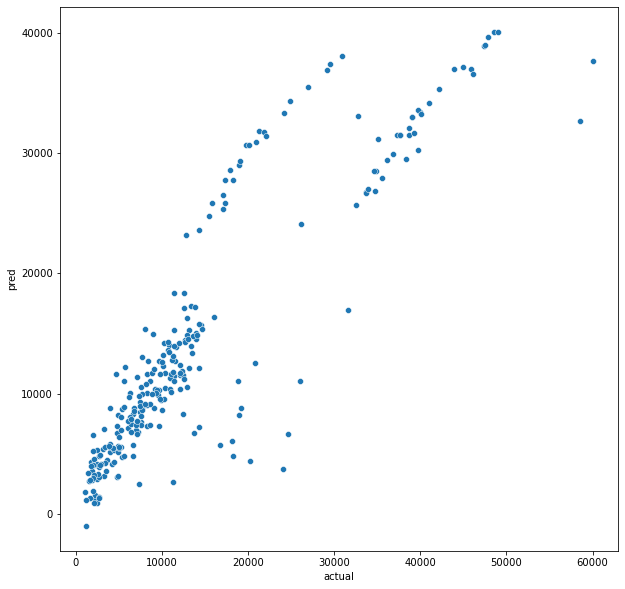

In [30]:
plt.figure(figsize=(10,10)) # 사이즈 설정
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

#### RMSE & R²(결정계수)

|평가지표|설명|
|-|-|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Absolute Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- 1에 가까울수록 좋음|

##### mean_squared_error()

In [31]:
from sklearn.metrics import mean_squared_error
# MSE
# mean_squared_error(y_test, pred)
# RMSE

mean_squared_error(y_test, pred) ** 0.5

5673.925913666443

In [32]:
mean_squared_error(y_test, pred, squared=False)

5673.925913666443

##### model.score()

- $R^2 = \frac{SSR}{SST}$<br>
    - **SST** (Sum of Squares Total) : 총변동
    - **SSR** (Sum of Squares Regression) : 설명 가능한 변동
    - 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?


In [33]:
model.score(X_train, y_train)

0.7380843471816282

In [34]:
pd.Series(model.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64

In [35]:
model.intercept_

-11353.689780589906

## 5. 모델 배포

In [36]:
!pip install mlxtend --quiet

In [38]:
import joblib

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [39]:
model_from_joblib = joblib.load('first_model.pkl')
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64